In [88]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [89]:
filename_n = f'../data/id000009-XV-INT.csv'
df_n = pd.read_csv(filename_n)
filename_p = f'../data/id000010-XV-INT.csv'
df_p = pd.read_csv(filename_p)

G = 4 * np.pi**2
m_s = 1.0
m_n = 0.00005149
m_p = 0.00000000658086572

energy = []
resang = []

for i in range(len(df_n)):
    #Get all the position, velocity, and angular momentum bits from both planets
    r_n = np.sqrt(df_n['px'][i]**2 + df_n['py'][i]**2 + df_n['pz'][i]**2)
    r_p = np.sqrt(df_p['px'][i]**2 + df_p['py'][i]**2 + df_p['pz'][i]**2)
    v_n = np.sqrt(df_n['vx'][i]**2 + df_n['vy'][i]**2 + df_n['vz'][i]**2)
    v_p = np.sqrt(df_p['vx'][i]**2 + df_p['vy'][i]**2 + df_p['vz'][i]**2)
    h_x_n = (df_n['py'][i] * df_n['vz'][i]) - (df_n['pz'][i] * df_n['vy'][i])
    h_y_n = (df_n['pz'][i] * df_n['vx'][i]) - (df_n['px'][i] * df_n['vz'][i])
    h_z_n = (df_n['px'][i] * df_n['vy'][i]) - (df_n['py'][i] * df_n['vx'][i])
    h_n = np.sqrt(h_x_n**2 + h_y_n**2 + h_z_n**2)
    h_x_p = (df_p['py'][i] * df_p['vz'][i]) - (df_p['pz'][i] * df_p['vy'][i])
    h_y_p = (df_p['pz'][i] * df_p['vx'][i]) - (df_p['px'][i] * df_p['vz'][i])
    h_z_p = (df_p['px'][i] * df_p['vy'][i]) - (df_p['py'][i] * df_p['vx'][i])
    h_p = np.sqrt(h_x_p**2 + h_y_p**2 + h_z_p**2)
    dist_np = np.sqrt((df_n['px'][i] - df_p['px'][i])**2 + (df_n['py'][i] - df_p['py'][i])**2 + (df_n['pz'][i] - df_p['pz'][i])**2)
    rdot_n = np.sign(df_n['px'][i]*df_n['vx'][i] + df_n['py'][i]*df_n['vy'][i] + df_n['pz'][i]*df_n['vz'][i]) * np.sqrt(v_n**2 - (h_n / r_n)**2)
    rdot_p = np.sign(df_p['px'][i]*df_p['vx'][i] + df_p['py'][i]*df_p['vy'][i] + df_p['pz'][i]*df_p['vz'][i]) * np.sqrt(v_p**2 - (h_p / r_p)**2)
    
    #Calculate the total energy of the system
    e = ((G * m_s * m_n) / r_n) + ((G * m_s * m_p) / r_p) + ((G * m_p * m_n) / dist_np)
    energy.append(e)
    
    #Get all the orbital element bits from both planets
    a_n = ((2 / r_n) - (v_n**2 / (G * m_s)))**(-1)
    a_p = ((2 / r_p) - (v_p**2 / (G * m_s)))**(-1)
    e_n = np.sqrt(1 - (h_n**2 / (a_n * G * m_s)))
    e_p = np.sqrt(1 - (h_p**2 / (a_p * G * m_s)))
    inc_n = np.arccos(h_z_n / h_n)
    inc_p = np.arccos(h_z_p / h_p)
    sin_omega_n = (np.sign(h_z_n) * h_x_n) / (h_n * np.sin(inc_n))
    cos_omega_n = -(np.sign(h_z_n) * h_y_n) / (h_n * np.cos(inc_n))
    omega_n = np.arctan2(sin_omega_n, cos_omega_n)
    sin_omega_p = (np.sign(h_z_p) * h_x_p) / (h_p * np.sin(inc_p))
    cos_omega_p = -(np.sign(h_z_p) * h_y_p) / (h_p * np.cos(inc_p))
    omega_p = np.arctan2(sin_omega_p, cos_omega_p)
    sin_f_n = rdot_n * ((a_n * (1 - e_n**2)) / (h_n * e_n))
    cos_f_n = (((a_n * (1 - e_n**2)) / r_n) - 1) / e_n
    f_n = np.arctan2(sin_f_n, cos_f_n)
    sin_f_p = rdot_p * ((a_p * (1 - e_p**2)) / (h_p * e_p))
    cos_f_p = (((a_p * (1 - e_p**2)) / r_p) - 1) / e_p
    f_p = np.arctan2(sin_f_p, cos_f_p)
    sin_littleomega_n = df_n['pz'][i] / (r_n * np.sin(inc_n))
    cos_littleomega_n = ((df_n['px'][i] / r_n) + (np.sin(omega_n) * sin_littleomega_n * np.cos(inc_n))) / np.cos(omega_n)
    littleomega_n = np.arctan2(sin_littleomega_n, cos_littleomega_n) - f_n
    varpi_n = omega_n + littleomega_n
    sin_littleomega_p = df_p['pz'][i] / (r_p * np.sin(inc_p))
    cos_littleomega_p = ((df_p['px'][i] / r_p) + (np.sin(omega_p) * sin_littleomega_p * np.cos(inc_p))) / np.cos(omega_p)
    littleomega_p = np.arctan2(sin_littleomega_p, cos_littleomega_p) - f_p
    varpi_p = omega_p + littleomega_p
    
    #Calculate the resonance angle of the system
    ecc_anom_n = 2 * (np.arctan(- np.sqrt((1 + e_n) / (1 - e_n)) * np.tan(f_n / 2)))
    ecc_anom_p = 2 * (np.arctan(- np.sqrt((1 + e_p) / (1 - e_p)) * np.tan(f_p / 2)))
    mean_anom_n = ecc_anom_n - (e_n * np.sin(ecc_anom_n))
    mean_anom_p = ecc_anom_p - (e_p * np.sin(ecc_anom_p))
    phi = (3 * (varpi_p + mean_anom_p)) - (2 * (varpi_n + mean_anom_n)) - varpi_p
    resang.append(phi)

KeyError: 'px'

KeyError: ' t'

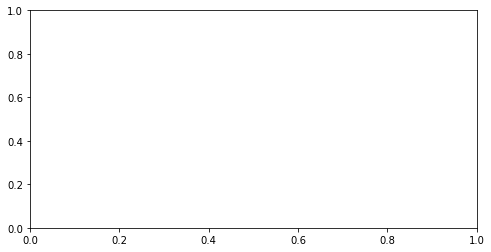

In [90]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df_n[' t'], energy)
z = np.polyfit(df_n[' t'], energy, 1)
p = np.poly1d(z)
plt.plot(df_n[' t'],p(df_n[' t']),"--")
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('$\Delta E$', fontsize=12)
plt.title('Change in Energy over Time', fontsize=12)
plt.tight_layout()

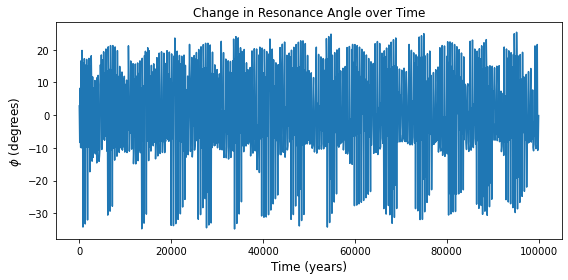

In [84]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df_n[' t'], resang)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('$\phi$ (degrees)', fontsize=12)
plt.title('Change in Resonance Angle over Time', fontsize=12)
plt.tight_layout()